Note: this is the same code as in the word2vec base python file, just in hopes that it will hang less than in iPython

In [1]:

#%%
import pandas as pd
import numpy as np
import sqlite3
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

# os.getcwd()
os.chdir('../../Data/')
os.getcwd()


#%% # # Process
tokens = pd.read_csv('redo_token_mod.csv')
tokens = tokens[~tokens.term_str.isna()]
#%% # ## Import tokens and convert to a corpus for Gensim

documents = pd.read_csv('redo_doc.csv') # , index_col='doc_id'
combo = pd.merge(tokens, documents, on='doc_id')
del(documents)
del(tokens)

#%%
OHCO = ['year','month','day','section','sentence_num']

corpus = combo.groupby(OHCO).term_str.apply(lambda  x:  x.tolist())    .reset_index()['term_str'].tolist()


#%%

# for article in corpus: # removed by the second line in tokens processes
#     for word in article:
#         if word =='nan':
#             del(word)

corpus[:5]
#%% # ## Generate word embeddings with Gensim's library

#%%
model = word2vec.Word2Vec(corpus, size=246, window=5, min_count=200, workers=4)
del(corpus)

#%% # ## Visualize with tSNE
#%% # ### Generate coordinates to plot

#%%
coords = pd.DataFrame(index=range(len(model.wv.vocab)))
coords['label'] = [w for w in model.wv.vocab]
coords['vector'] = coords['label'].apply(lambda x: model.wv.get_vector(x))

#%% # ### Use ScikitLearn's TSNE library

#%%
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values = tsne_model.fit_transform(coords['vector'].tolist())


#%%
coords['x'] = tsne_values[:,0]
coords['y'] = tsne_values[:,1]


#%%
coords.head()


C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


label                                             vector          x  \
0  marketing  [0.5670426, 0.8369786, -0.14496453, -0.2797053... -27.480597   
1        and  [-0.24571538, 0.9501611, -1.2343581, 0.3636177...  21.047373   
2      media  [1.5899105, -1.0859771, 0.62767375, -1.9080794... -21.448195   
3       list  [-1.5133647, -0.42863762, 1.2696475, -0.180615... -13.930991   
4         of  [0.10948751, -0.68652105, -0.9261518, 0.321634...  26.585932   

           y  
0  26.113367  
1  -5.370087  
2  40.171051  
3   2.243317  
4  -5.350019

In [2]:
coords_full = coords
coords_full.to_csv("tsne_coordinates.csv")
coords = coords.sample(500)

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

# os.getcwd()
os.chdir('../../Data/')
os.getcwd()

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


'C:\\Users\\alxgr\\Documents\\UVA\\DSI\\Spring 2019\\ETA\\Project ETA\\Github\\Data'

In [28]:
coords = pd.read_csv('tsne_coordinates.csv', index_col = 'Unnamed: 0')
coords.head()

label                                             vector          x  \
0  marketing  [ 0.5670426   0.8369786  -0.14496453 -0.279705... -27.480597   
1        and  [-2.45715380e-01  9.50161099e-01 -1.23435807e+...  21.047373   
2      media  [ 1.5899105  -1.0859771   0.62767375 -1.908079... -21.448195   
3       list  [-1.5133647  -0.42863762  1.2696475  -0.180615... -13.930991   
4         of  [ 0.10948751 -0.68652105 -0.9261518   0.321634...  26.585932   

           y  
0  26.113367  
1  -5.370087  
2  40.171050  
3   2.243317  
4  -5.350019

In [29]:
coords = coords.sample(500)
coords.reset_index(inplace = True, drop=True)
coords.head()

label                                             vector          x  \
0    processed  [ 5.08774102e-01 -2.70375963e-02 -8.04859936e-...  52.095062   
1       arctic  [-0.08943463  0.05518532 -0.17907472 -1.651575... -36.010727   
2          art  [-0.82167304  0.4714575   2.059703   -0.119440... -33.878746   
3  subscribers  [ 1.4768      0.55437154  1.2562788   0.717650... -63.071170   
4       hiding  [-0.5237026   0.46355832 -1.46434     0.722683...  52.361960   

           y  
0 -22.449368  
1  13.412799  
2 -10.637388  
3  10.498686  
4 -19.705370

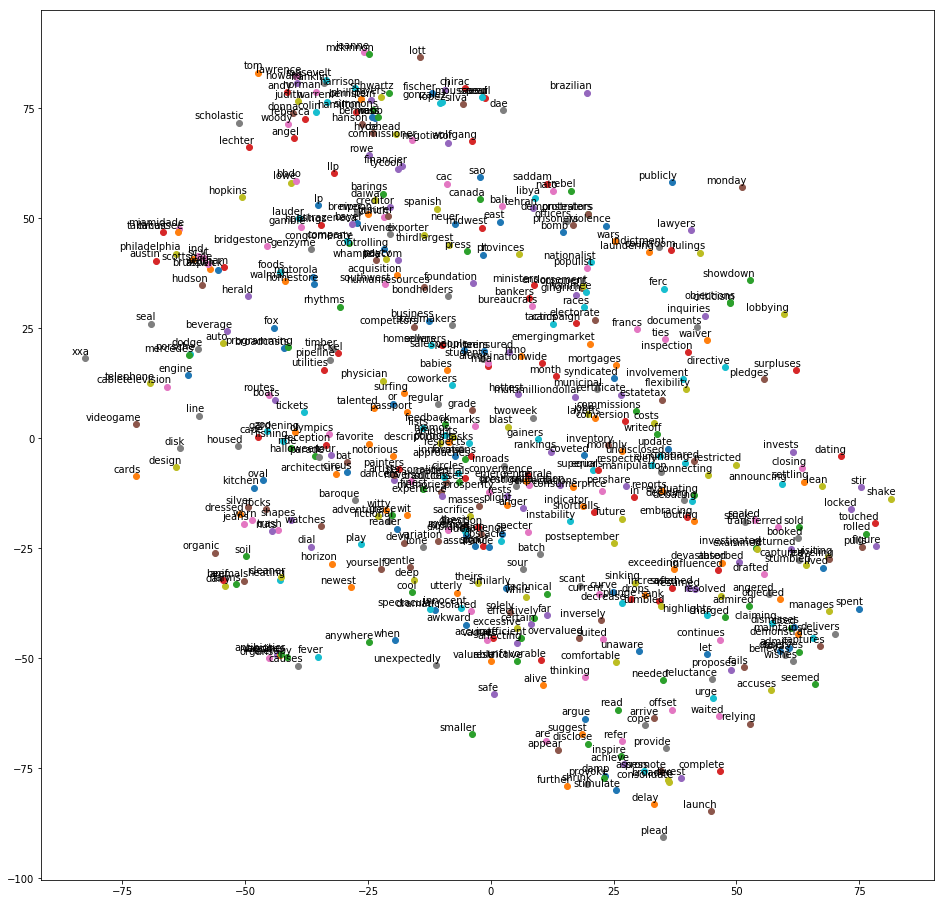

In [21]:
plt.figure(figsize=(16, 16)) 
for i in range(len(coords)):
    plt.scatter(coords.x[i],coords.y[i])
    plt.annotate(coords['label'][i],
                 xy=(coords.x[i], coords.y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.savefig('wsj wordcloud reduced.png')
plt.show()

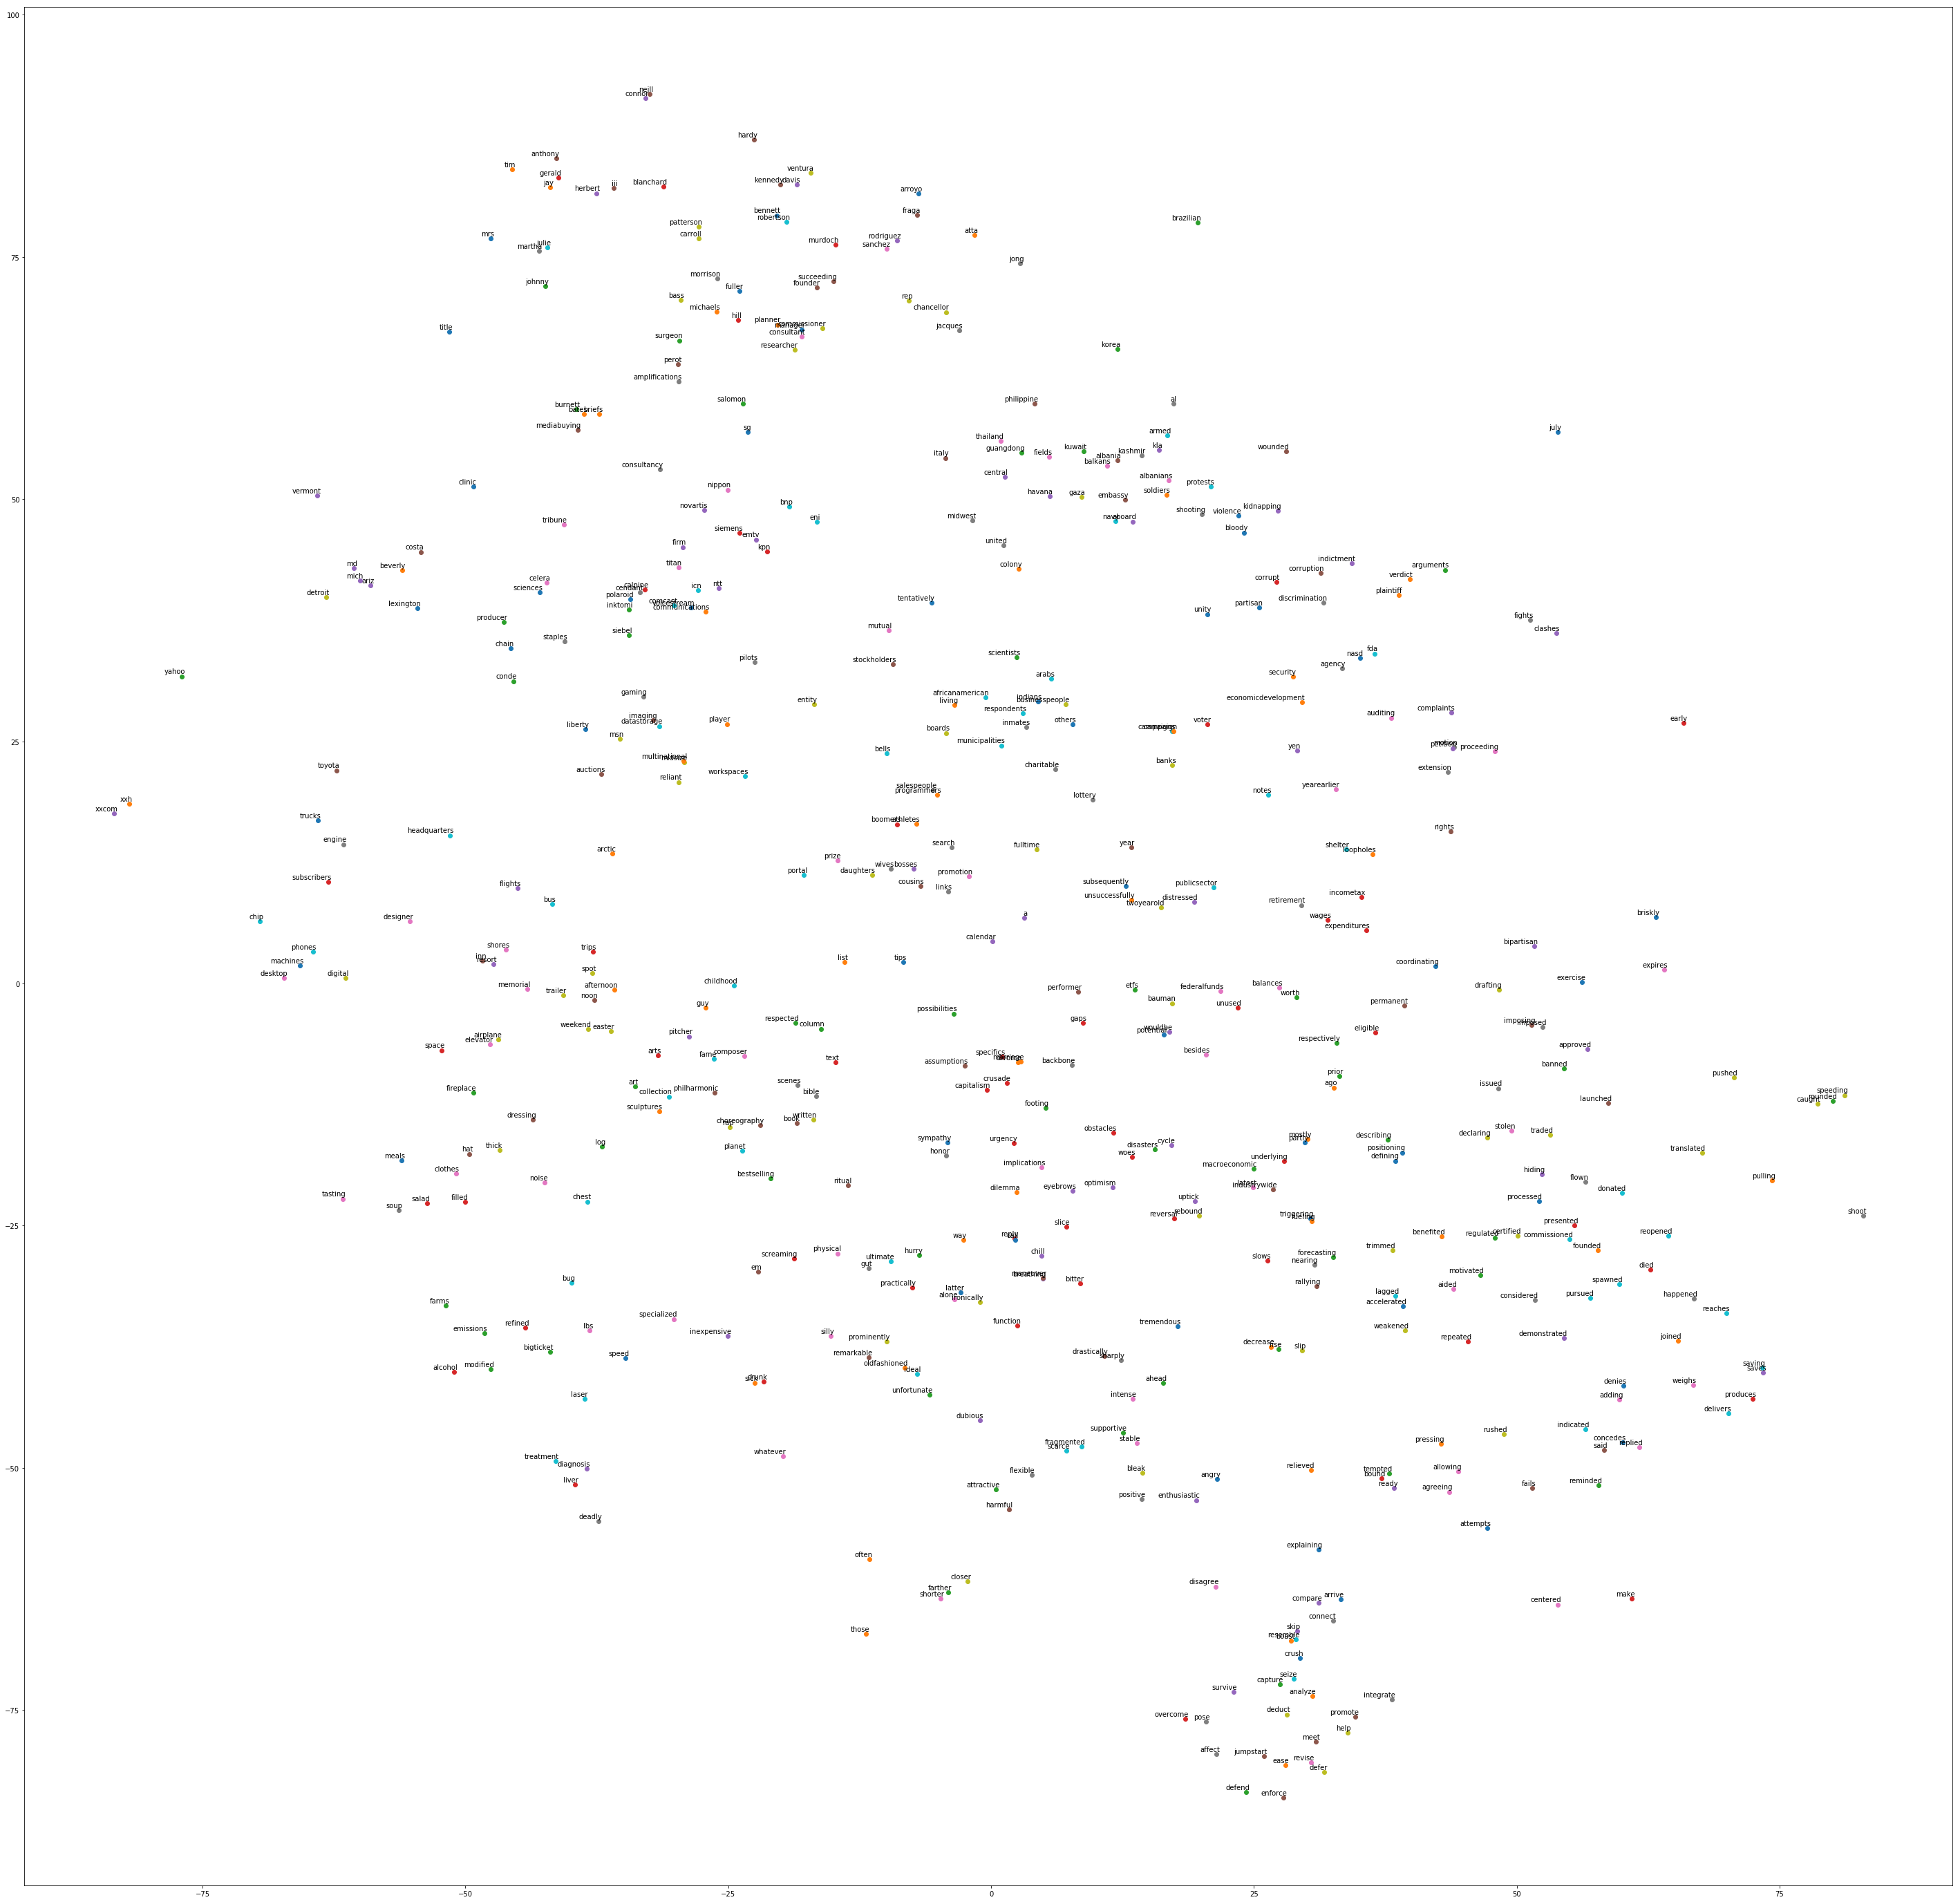

In [30]:
plt.figure(figsize=(50, 50)) 
for i in range(len(coords)):
    plt.scatter(coords.x[i],coords.y[i])
    plt.annotate(coords['label'][i],
                 xy=(coords.x[i], coords.y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.savefig('wsj wordcloud reduced 2.png')
plt.show()

In [24]:
coords = pd.read_csv('tsne_coordinates.csv', index_col = 'Unnamed: 0')
coords = coords.sample(5000)
coords.reset_index(inplace = True, drop=True)
coords.head()

label                                             vector          x  \
0      revamp  [ 1.28178704e+00 -1.03466022e+00 -6.24774881e-...  35.796413   
1     transit  [ 0.06181608  0.65574694  0.34212396 -0.514475... -39.255398   
2   incubator  [ 0.66080785  0.172748   -0.9132852  -0.865023... -27.566067   
3  inevitably  [-1.32284701e+00  3.14648360e-01  9.48545635e-...   0.056899   
4      hourly  [-0.47074685 -0.7621126  -0.6309164  -0.380177...  27.105145   

           y  
0 -78.856224  
1  13.147943  
2  28.844164  
3 -32.955030  
4  -2.965478

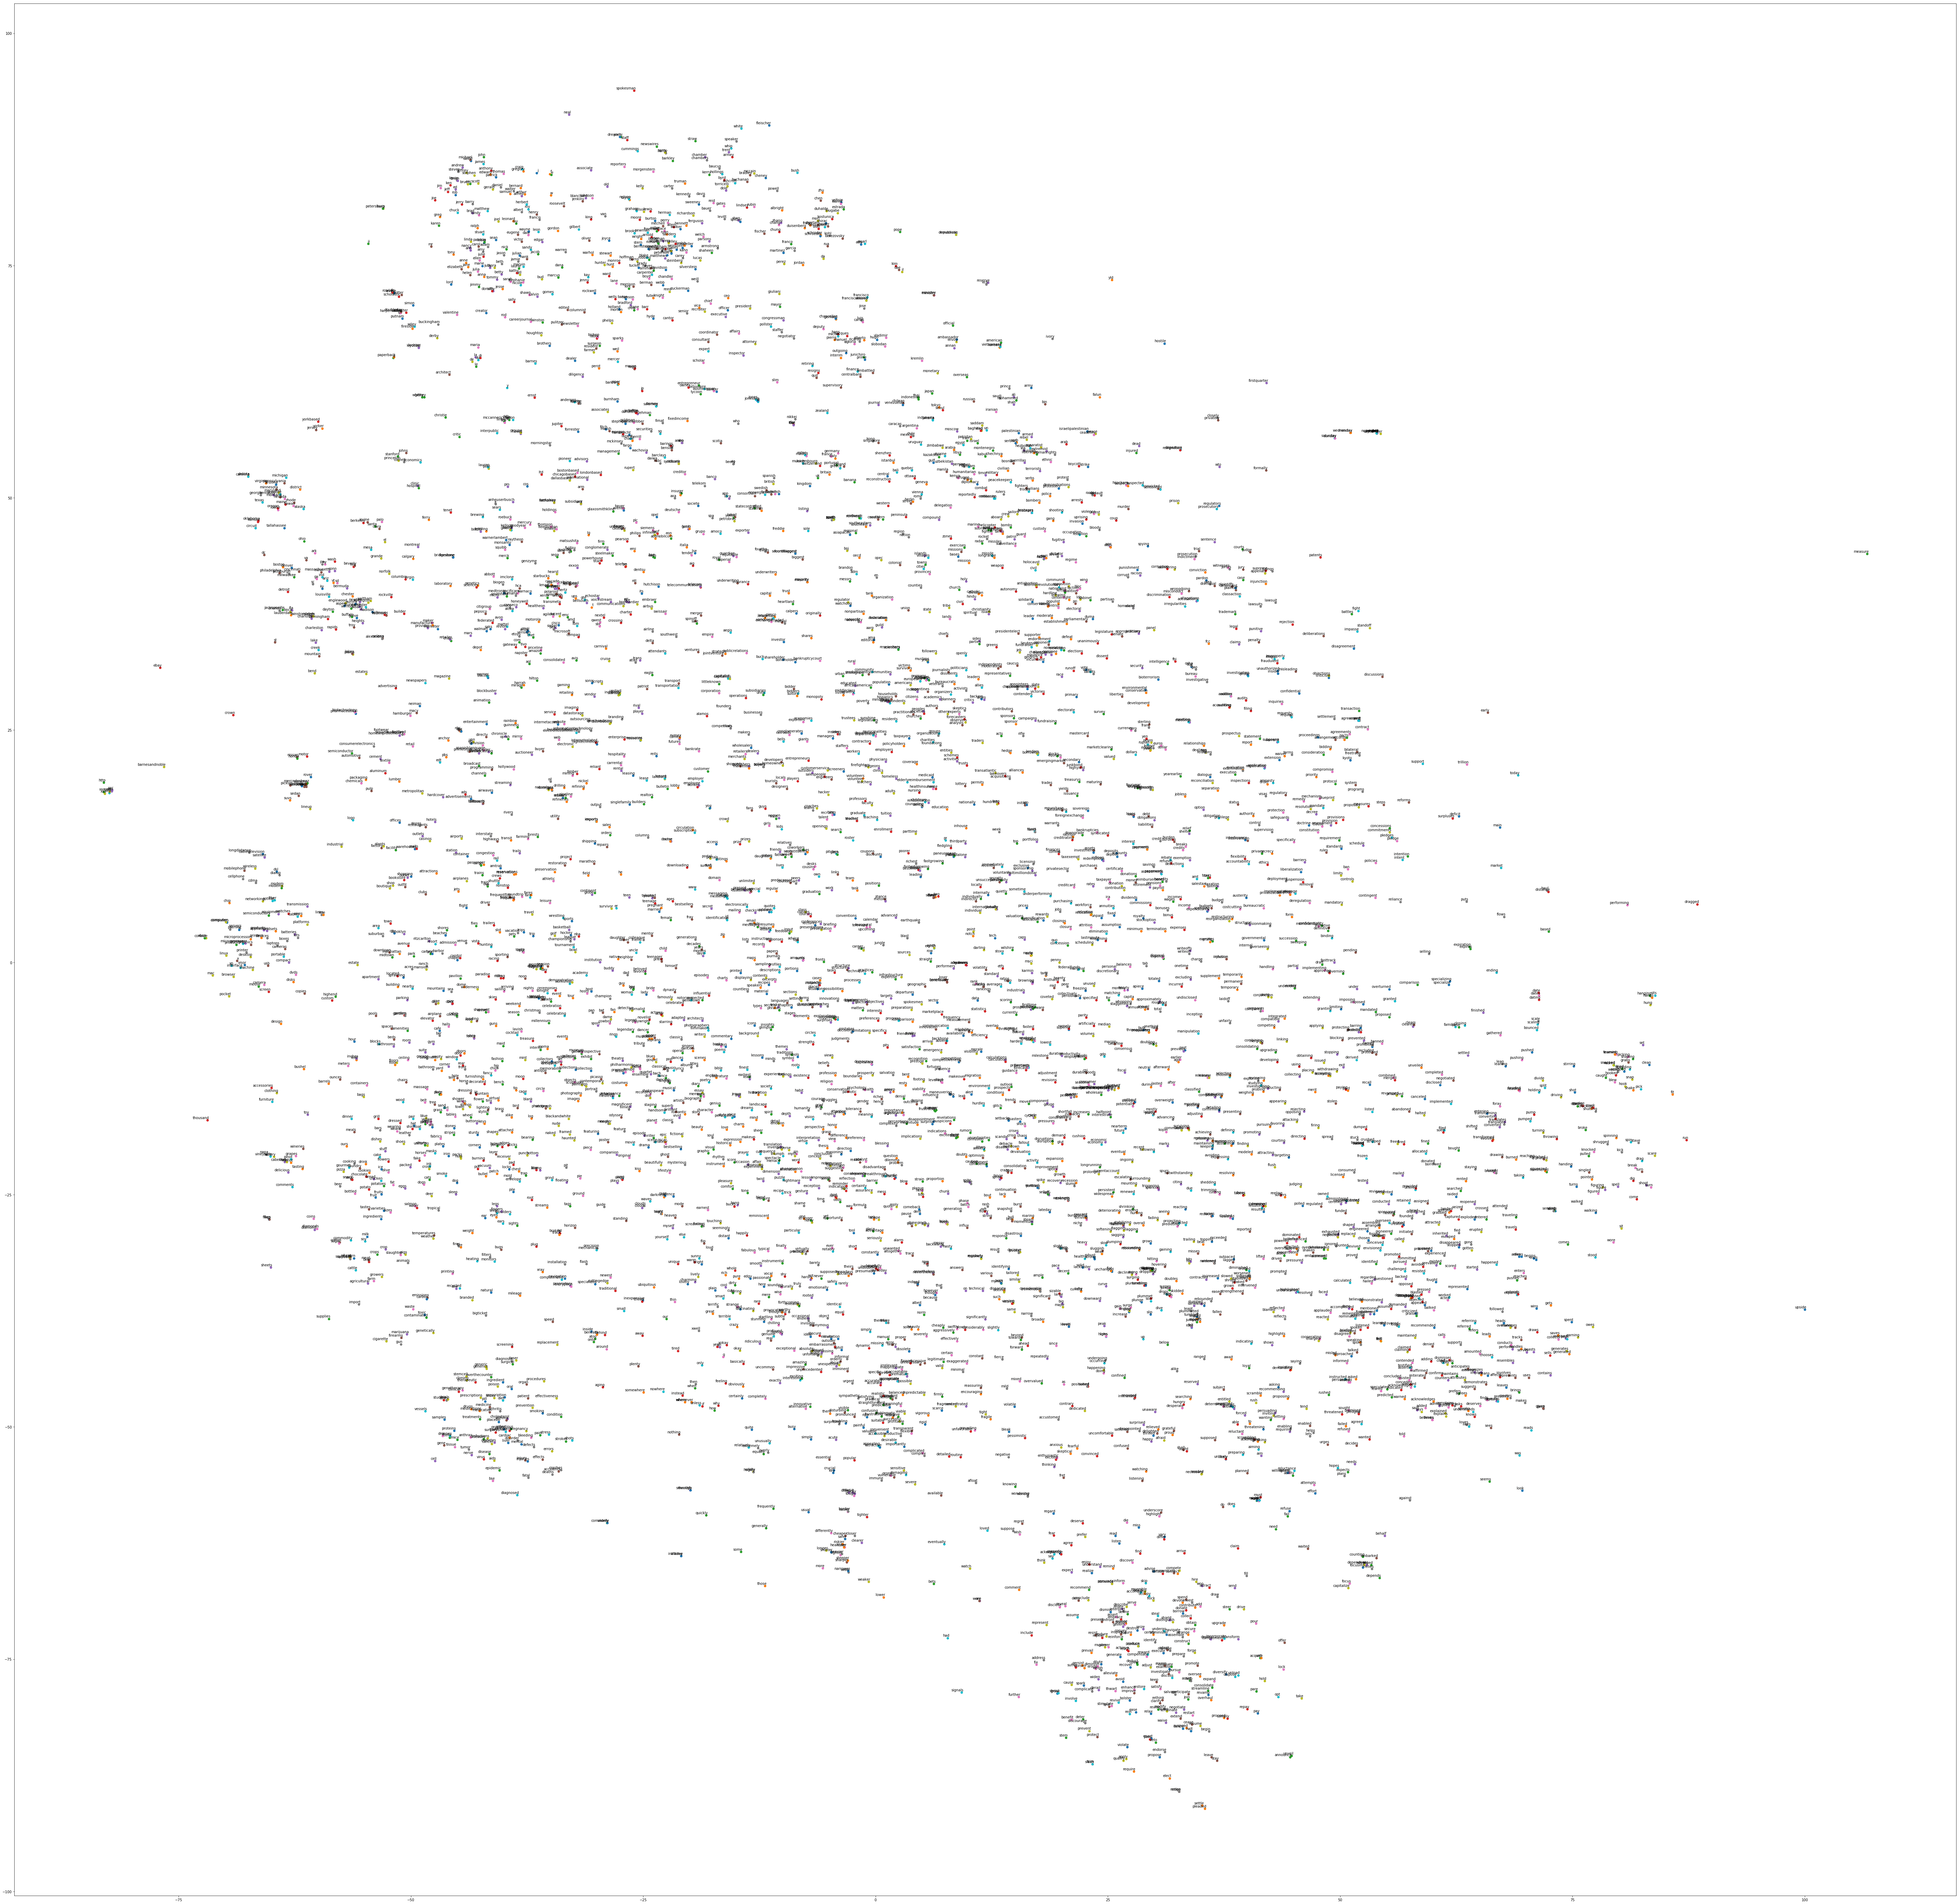

In [26]:
plt.figure(figsize=(100, 100)) 
for i in range(len(coords)):
    plt.scatter(coords.x[i],coords.y[i])
    plt.annotate(coords['label'][i],
                 xy=(coords.x[i], coords.y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.savefig('wsj wordcloud reduced 3.png')
plt.show()